In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

x_train = train
x_train['Date'] = pd.to_datetime(x_train['Date'], errors='coerce')
x_train

# x_train['Season'] = x_train['Date'].dt.month
# x_train['Season']=x_train['Season'].replace([4,5,6,7,8,9],1)
# x_train['Season']=x_train['Season'].replace([1,2,3,10,11,12],0)
# x_train['Weekend'] = x_train['Date'].dt.dayofweek
# x_train['Weekend']=x_train['Weekend'].replace([0,1,2,3,4,5,6],[0,0,0,0,1,1,0])
# x_train.drop(['Date'],inplace=True,axis=1)

x_train_A = x_train[x_train['Procedure']=='A']
x_train_B = x_train[x_train['Procedure']=='B']
x_train_C = x_train[x_train['Procedure']=='C']

qwe = x_train_A['Date'].dt.month
qwer = x_train_A.copy()
# P_1 = [1 if x is 'A' else 0 for x in x_train['Procedure']]
# P_2 = [1 if x is 'B' else 0 for x in x_train['Procedure']]
# P_3 = [1 if x is 'C' else 0 for x in x_train['Procedure']]
# x_train['P_1'] = P_1
# x_train['P_2'] = P_2
# x_train['P_3'] = P_3
y_train_A = x_train_A['n_Procedure']
y_train_B = x_train_B['n_Procedure']
y_train_C = x_train_B['n_Procedure']
x_train_A.drop(['Procedure','Date','n_Procedure'],inplace=True,axis=1)
x_train_B.drop(['Procedure','Date','n_Procedure'],inplace=True,axis=1)
x_train_C.drop(['Procedure','Date','n_Procedure'],inplace=True,axis=1)

# scaler = StandardScaler()
# x_train_A=scaler.fit_transform(x_train_A)

# x_train_B=scaler.fit_transform(x_train_B)
# x_train_C=scaler.fit_transform(x_train_C)
# x_train_A=np.array(x_train_A)
# x_train_B=np.array(x_train_B)
# x_train_C=np.array(x_train_C)
# print(x_train_B.shape)
# x_train_A = np.reshape(x_train_A, (x_train_A.shape[0], 1, x_train_A.shape[1]))
# x_train_B = np.reshape(x_train_B, (x_train_B.shape[0], 1, x_train_B.shape[1]))
# x_train_C = np.reshape(x_train_C, (x_train_C.shape[0], 1, x_train_C.shape[1]))

# print(np.shape(x_train_A))

# k = 1
# x_A,y_A = x_train_A[:-k],y_train_A[:-k]
# x_t_A,y_t_A = x_train_A[-k:],y_train_A[-k:]
# print(x_A.shape)


# x_B,y_B = x_train_B[:-k],y_train_B[:-k]
# x_t_B,y_t_B = x_train_B[-k:],y_train_B[-k:]
# print(x_B.shape)


# x_C,y_C = x_train_C[:-k],y_train_C[:-k]
# x_t_C,y_t_C = x_train_C[-k:],y_train_C[-k:]
# print(x_C.shape)

In [77]:
qwe

0      12
3      12
6      12
9      12
12     12
       ..
963    10
966    10
969    10
972    10
975    10
Name: Date, Length: 326, dtype: int64

In [79]:
mwise = np.zeros(300)
for i in range(len(qwe)):
    print(qwe[3*i])
    mwise[qwe[3*i]] = mwise[qwe[3*i]] + qwer['n_Procedure'][i]

12
12


KeyError: 1

In [33]:
xamod = []
xbmod = []
xcmod = []
ya = []
yb = []
yc = []

tdiff = []

for i in range(len(x_train)):
    if(x_train['Procedure'][i] == 'A'):
        if(i == 0):
            xamod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-24])
            tdiff.append(x_train['Temperature'][i]-24)
        else:
            xamod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-x_train['Temperature'][i-1]])
            tdiff.append(x_train['Temperature'][i]-x_train['Temperature'][i-1])
        ya.append(x_train['n_Procedure'][i])
    elif(x_train['Procedure'][i] == 'B'):
        if(i == 0):
            xbmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-24])
#             tdiff.append(x_train['Temperature'][i]-24)
        else:
            xbmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-x_train['Temperature'][i-1]])
#             tdiff.append(x_train['Temperature'][i]-x_train['Temperature'][i-1])
        yb.append(x_train['n_Procedure'][i])
    elif(x_train['Procedure'][i] == 'C'):
        if(i == 0):
            xcmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-24])
#             tdiff.append(x_train['Temperature'][i]-24)
        else:
            xcmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-x_train['Temperature'][i-1]])
#             tdiff.append(x_train['Temperature'][i]-x_train['Temperature'][i-1])
        yc.append(x_train['n_Procedure'][i])

In [88]:
tdiff
    

[3,
 -6,
 -1,
 7,
 -5,
 1,
 1,
 -4,
 5,
 0,
 0,
 -4,
 5,
 -3,
 5,
 -9,
 1,
 4,
 0,
 3,
 3,
 -11,
 0,
 0,
 1,
 3,
 0,
 1,
 1,
 3,
 -7,
 2,
 -4,
 3,
 -1,
 -2,
 2,
 0,
 0,
 7,
 -7,
 -1,
 5,
 -5,
 9,
 0,
 -8,
 5,
 -6,
 0,
 -3,
 1,
 0,
 4,
 -1,
 -2,
 8,
 -1,
 0,
 2,
 -5,
 -1,
 1,
 -2,
 -2,
 5,
 0,
 -1,
 1,
 1,
 0,
 -5,
 9,
 4,
 0,
 0,
 -11,
 4,
 -2,
 9,
 -10,
 3,
 1,
 1,
 -5,
 2,
 7,
 -6,
 1,
 -3,
 3,
 -4,
 10,
 1,
 -3,
 -5,
 5,
 -2,
 -5,
 2,
 -3,
 7,
 -1,
 -2,
 -5,
 5,
 5,
 2,
 2,
 2,
 -2,
 -12,
 -4,
 2,
 -1,
 0,
 6,
 6,
 -6,
 0,
 -1,
 0,
 9,
 3,
 -11,
 7,
 0,
 -3,
 -3,
 -2,
 0,
 6,
 0,
 -6,
 8,
 -6,
 7,
 2,
 -9,
 14,
 -9,
 -3,
 1,
 1,
 4,
 -4,
 7,
 5,
 -1,
 -4,
 0,
 -7,
 1,
 9,
 -7,
 -4,
 4,
 6,
 3,
 -10,
 10,
 -2,
 -5,
 -1,
 0,
 -2,
 3,
 -3,
 0,
 -3,
 9,
 2,
 -2,
 -8,
 1,
 3,
 -6,
 10,
 3,
 0,
 -2,
 -2,
 3,
 4,
 -4,
 -3,
 -8,
 6,
 -5,
 0,
 11,
 2,
 -3,
 -8,
 10,
 -9,
 1,
 -1,
 12,
 -2,
 -4,
 -6,
 10,
 -4,
 -1,
 4,
 -9,
 7,
 0,
 -7,
 7,
 -1,
 0,
 -8,
 1,
 4,
 3,
 -5,
 7,
 -4,
 2,
 -1,
 4,

8
8
4
4
10
10
3
3
9
9
6
6
7
7
7
7
2
2
9
9
8
8
7
7
7
7
2
2
5
5
2
2
6
6
7
7
7
7
1
1
4
4
5
5
4
4
7
7
4
4
0
0
3
3
3
3
7
7
4
4
8
8
6
6
4
4
4
4
4
4
4
4
6
6
4
4
5
5
3
3
4
4
6
6
5
5
4
4
4
4
5
5


5.086956521739131

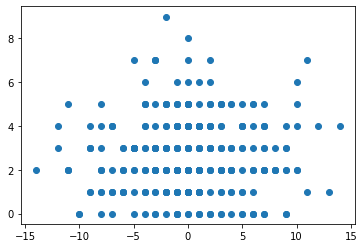

In [87]:
# len(tdiff)
plt.scatter(x = tdiff,y = yb)
s = 0
l = 0
for i in range(len(ya)):
#     if(yc[i] > 6):
#         print(tdiff[i])
    if(tdiff[i] > 5):
        print(ya[i])
        s = s + ya[i]
        l = l + 1
        print(ya[i])
s/l

In [75]:
xasmod = []
xbsmod = []
xcsmod = []
ya = []
yb = []
yc = []

for i in range(len(x_train)):
    if(x_train['Procedure'][i] == 'A'):
        if(i == 0):
            xasmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-24])
        else:
            xasmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-x_train['Temperature'][i]])
        ya.append(x_train['n_Procedure'][i])
    elif(x_train['Procedure'][i] == 'B'):
        if(i == 0):
            xbsmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-24])
        else:
            xbsmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-x_train['Temperature'][i]])
        yb.append(x_train['n_Procedure'][i])
    elif(x_train['Procedure'][i] == 'C'):
        if(i == 0):
            xcsmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-24])
        else:
            xcsmod.append([x_train['Temperature'][i],x_train['EventTarget'][i],x_train['Temperature'][i]-x_train['Temperature'][i]])
        yc.append(x_train['n_Procedure'][i])

In [56]:
xasmod

[[27, 1, 3, 2],
 [21, 0, 0, 8],
 [20, 1, 0, 10],
 [27, 0, 0, 12],
 [22, 0, 0, 17],
 [23, 0, 0, 9],
 [24, 2, 0, 9],
 [20, 2, 0, 14],
 [25, 2, 0, 6],
 [25, 2, 0, 14],
 [25, 2, 0, 4],
 [21, 2, 0, 18],
 [26, 2, 0, 13],
 [23, 0, 0, 15],
 [28, 0, 0, 10],
 [19, 0, 0, 10],
 [20, 0, 0, 10],
 [24, 0, 0, 9],
 [24, 0, 0, 19],
 [27, 0, 0, 17],
 [30, 0, 0, 18],
 [19, 0, 0, 11],
 [19, 0, 0, 7],
 [19, 0, 0, 11],
 [20, 0, 0, 16],
 [23, 0, 0, 8],
 [23, 0, 0, 14],
 [24, 0, 0, 13],
 [25, 0, 0, 10],
 [28, 0, 0, 13],
 [21, 0, 0, 14],
 [23, 0, 0, 8],
 [19, 1, 0, 14],
 [22, 2, 0, 12],
 [21, 2, 0, 11],
 [19, 0, 0, 6],
 [21, 0, 0, 18],
 [21, 0, 0, 8],
 [21, 0, 0, 11],
 [28, 2, 0, 8],
 [21, 2, 0, 10],
 [20, 2, 0, 8],
 [25, 0, 0, 15],
 [20, 0, 0, 7],
 [29, 0, 0, 15],
 [29, 0, 0, 12],
 [21, 0, 0, 14],
 [26, 2, 0, 7],
 [20, 2, 0, 11],
 [20, 2, 0, 9],
 [17, 2, 0, 17],
 [18, 0, 0, 8],
 [18, 0, 0, 11],
 [22, 0, 0, 12],
 [21, 2, 0, 11],
 [19, 2, 0, 10],
 [27, 2, 0, 8],
 [26, 2, 0, 9],
 [26, 1, 0, 10],
 [28, 1, 0, 15],


In [124]:
x_train_A=np.array(xamod)
x_train_B=np.array(xbmod)
x_train_C=np.array(xcmod)
print(x_train_B.shape)
x_train_A = np.reshape(x_train_A, (x_train_A.shape[0], 1, x_train_A.shape[1]))
x_train_B = np.reshape(x_train_B, (x_train_B.shape[0], 1, x_train_B.shape[1]))
x_train_C = np.reshape(x_train_C, (x_train_C.shape[0], 1, x_train_C.shape[1]))


print(np.shape(x_train_A))

k = 1
x_A,y_A = x_train_A[:-k],y_train_A[:-k]
x_t_A,y_t_A = x_train_A[-k:],y_train_A[-k:]
print(x_A.shape)


x_B,y_B = x_train_B[:-k],y_train_B[:-k]
x_t_B,y_t_B = x_train_B[-k:],y_train_B[-k:]
print(x_B.shape)


x_C,y_C = x_train_C[:-k],y_train_C[:-k]
x_t_C,y_t_C = x_train_C[-k:],y_train_C[-k:]
print(x_C.shape)

(326, 3)
(326, 1, 3)
(325, 1, 3)
(325, 1, 3)
(325, 1, 3)


In [29]:
# mu = scaler.mu

# std = np.sqrt(scaler.var_)
# mu = scaler.mean_
# std,mu

In [125]:
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM,Bidirectional
def train_pred_eval_model(x_train_scaled, \
                          y_train_scaled, \
                          x_test_scaled, \
                          y_test, \
                          lstm_units, \
                          dropout_prob, \
                          optimizer, \
                          epochs, \
                          batch_size):
    '''
    Train model, do prediction, scale back to original range and do 
    evaluation
    Use LSTM here.
    Returns rmse, mape and predicted values
    Inputs
        x_train_scaled  : e.g. x_train_scaled.shape=(451, 9, 1). 
                          Here we are using the past 9 values to  
                          predict the next value
        y_train_scaled  : e.g. y_train_scaled.shape=(451, 1)
        x_test_scaled   : use this to do predictions 
        y_test          : actual value of the predictions
        mu_test_list    : list of the means. Same length as 
                          x_test_scaled and y_test
        std_test_list   : list of the std devs. Same length as 
                          x_test_scaled and y_test
        lstm_units      : dimensionality of the output space
        dropout_prob    : fraction of the units to drop for the 
                          linear transformation of the inputs
        optimizer       : optimizer for model.compile()
        epochs          : epochs for model.fit()
        batch_size      : batch size for model.fit()
    Outputs
        rmse            : root mean square error
        mape            : mean absolute percentage error
        est             : predictions
    '''
    # Create the LSTM network
    model = Sequential()
#     print(x_train_scaled.shape,y_train_scaled.shape,(x_train_scaled.shape[1],1))
    model.add((LSTM(units=lstm_units,
                   return_sequences=True, 
                   input_shape=(1,x_train_scaled.shape[2]))))
    # Add dropput with a probability of 0.5
    model.add(Dropout(dropout_prob)) 
    model.add(Bidirectional(LSTM(units=lstm_units)))
    # Add dropput with a probability of 0.5
    model.add(Dropout(dropout_prob)) 
    model.add(Dense(1))
    # Compile and fit the LSTM network
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x_train_scaled, y_train_scaled, epochs=epochs,   
              batch_size=batch_size, verbose=1)
    est=[]
#     # Do prediction
    est = model.predict(x_test_scaled)
#     est = (est_scaled * np.array(std_test_list).reshape(-1,1)) +  np.array(mu_test_list).reshape(-1,1)
    
    # Calculate RMSE and MAPE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    print(rmse)
    print(np.exp(-rmse))
    return rmse, est,model
#     return model

In [126]:
 val_A=train_pred_eval_model(x_A,y_A, x_A,y_A,5,0.5,'nadam',1000,10)                            

Epoch 1/1000
325/325 [==============================] - 6s 19ms/step - loss: 32.3541
Epoch 2/1000
325/325 [==============================] - 0s 665us/step - loss: 28.6263
Epoch 3/1000
325/325 [==============================] - 0s 457us/step - loss: 25.1069
Epoch 4/1000
325/325 [==============================] - 0s 539us/step - loss: 20.2239
Epoch 5/1000
325/325 [==============================] - 0s 479us/step - loss: 15.2989
Epoch 6/1000
325/325 [==============================] - 0s 454us/step - loss: 12.6874
Epoch 7/1000
325/325 [==============================] - 0s 444us/step - loss: 11.0350
Epoch 8/1000
325/325 [==============================] - 0s 498us/step - loss: 10.2259
Epoch 9/1000
325/325 [==============================] - 0s 493us/step - loss: 8.5547
Epoch 10/1000
325/325 [==============================] - 0s 468us/step - loss: 9.5347
Epoch 11/1000
325/325 [==============================] - 0s 501us/step - loss: 8.2857
Epoch 12/1000
325/325 [==============================] -

325/325 [==============================] - 0s 606us/step - loss: 5.0624
Epoch 191/1000
325/325 [==============================] - 0s 377us/step - loss: 5.2277
Epoch 192/1000
325/325 [==============================] - 0s 380us/step - loss: 5.1804
Epoch 193/1000
325/325 [==============================] - 0s 512us/step - loss: 5.1140
Epoch 194/1000
325/325 [==============================] - 0s 518us/step - loss: 5.3083
Epoch 195/1000
325/325 [==============================] - 0s 420us/step - loss: 5.1374
Epoch 196/1000
325/325 [==============================] - 0s 484us/step - loss: 5.2824
Epoch 197/1000
325/325 [==============================] - 0s 534us/step - loss: 5.1476
Epoch 198/1000
325/325 [==============================] - 0s 555us/step - loss: 5.2135
Epoch 199/1000
325/325 [==============================] - 0s 525us/step - loss: 5.4007
Epoch 200/1000
325/325 [==============================] - 0s 493us/step - loss: 5.1664
Epoch 201/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 512us/step - loss: 4.8688
Epoch 379/1000
325/325 [==============================] - 0s 488us/step - loss: 4.8852
Epoch 380/1000
325/325 [==============================] - 0s 461us/step - loss: 4.8538
Epoch 381/1000
325/325 [==============================] - 0s 516us/step - loss: 4.8736
Epoch 382/1000
325/325 [==============================] - 0s 463us/step - loss: 4.9385
Epoch 383/1000
325/325 [==============================] - 0s 443us/step - loss: 4.8089
Epoch 384/1000
325/325 [==============================] - 0s 440us/step - loss: 4.9092
Epoch 385/1000
325/325 [==============================] - 0s 446us/step - loss: 4.8955
Epoch 386/1000
325/325 [==============================] - 0s 452us/step - loss: 4.8696
Epoch 387/1000
325/325 [==============================] - 0s 426us/step - loss: 4.8814
Epoch 388/1000
325/325 [==============================] - 0s 438us/step - loss: 4.9020
Epoch 389/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 552us/step - loss: 4.8140
Epoch 567/1000
325/325 [==============================] - 0s 473us/step - loss: 4.8706
Epoch 568/1000
325/325 [==============================] - 0s 523us/step - loss: 4.8415
Epoch 569/1000
325/325 [==============================] - 0s 465us/step - loss: 4.8260
Epoch 570/1000
325/325 [==============================] - 0s 481us/step - loss: 4.8144
Epoch 571/1000
325/325 [==============================] - 0s 377us/step - loss: 4.8728
Epoch 572/1000
325/325 [==============================] - 0s 375us/step - loss: 4.8581
Epoch 573/1000
325/325 [==============================] - 0s 464us/step - loss: 4.8907
Epoch 574/1000
325/325 [==============================] - 0s 442us/step - loss: 4.8772
Epoch 575/1000
325/325 [==============================] - 0s 408us/step - loss: 4.8375
Epoch 576/1000
325/325 [==============================] - 0s 380us/step - loss: 4.8295
Epoch 577/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 703us/step - loss: 4.8334
Epoch 755/1000
325/325 [==============================] - 0s 649us/step - loss: 4.8107
Epoch 756/1000
325/325 [==============================] - 0s 598us/step - loss: 4.8546
Epoch 757/1000
325/325 [==============================] - 0s 635us/step - loss: 4.8133
Epoch 758/1000
325/325 [==============================] - 0s 635us/step - loss: 4.8386
Epoch 759/1000
325/325 [==============================] - 0s 687us/step - loss: 4.8429
Epoch 760/1000
325/325 [==============================] - 0s 642us/step - loss: 4.8283
Epoch 761/1000
325/325 [==============================] - 0s 612us/step - loss: 4.8482
Epoch 762/1000
325/325 [==============================] - 0s 743us/step - loss: 4.7937
Epoch 763/1000
325/325 [==============================] - 0s 581us/step - loss: 4.8292
Epoch 764/1000
325/325 [==============================] - 0s 701us/step - loss: 4.7879
Epoch 765/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 656us/step - loss: 4.8113
Epoch 943/1000
325/325 [==============================] - 0s 583us/step - loss: 4.8922
Epoch 944/1000
325/325 [==============================] - 0s 710us/step - loss: 4.8273
Epoch 945/1000
325/325 [==============================] - 0s 572us/step - loss: 4.7893
Epoch 946/1000
325/325 [==============================] - 0s 707us/step - loss: 4.7604
Epoch 947/1000
325/325 [==============================] - 0s 593us/step - loss: 4.8805
Epoch 948/1000
325/325 [==============================] - 0s 674us/step - loss: 4.7917
Epoch 949/1000
325/325 [==============================] - 0s 623us/step - loss: 4.8314
Epoch 950/1000
325/325 [==============================] - 0s 662us/step - loss: 4.7461
Epoch 951/1000
325/325 [==============================] - 0s 611us/step - loss: 4.7392
Epoch 952/1000
325/325 [==============================] - 0s 718us/step - loss: 4.8357
Epoch 953/1000
325/325 [==============================] - 

In [82]:
pred_A = val_A[1]
# pred1_A = np.round(pred_A)

In [83]:
pred_A

array([[11.529915 ],
       [11.5299225],
       [11.530017 ],
       [11.529916 ],
       [11.52992  ],
       [11.529918 ],
       [11.530099 ],
       [11.53089  ],
       [11.530037 ],
       [11.530037 ],
       [11.530037 ],
       [11.530558 ],
       [11.529995 ],
       [11.529918 ],
       [11.529915 ],
       [11.529931 ],
       [11.529925 ],
       [11.529917 ],
       [11.529917 ],
       [11.529916 ],
       [11.529915 ],
       [11.529931 ],
       [11.529931 ],
       [11.529931 ],
       [11.529925 ],
       [11.529918 ],
       [11.529918 ],
       [11.529917 ],
       [11.529917 ],
       [11.529915 ],
       [11.5299225],
       [11.529918 ],
       [11.53007  ],
       [11.530338 ],
       [11.530558 ],
       [11.529931 ],
       [11.5299225],
       [11.5299225],
       [11.5299225],
       [11.52995  ],
       [11.530558 ],
       [11.53089  ],
       [11.529917 ],
       [11.529925 ],
       [11.529915 ],
       [11.529915 ],
       [11.5299225],
       [11.52

In [7]:
# z_A=y_t_A
# r = math.sqrt(mean_squared_error(z_A,pred1_A))
# r

In [8]:
# print(np.exp(-r))

In [127]:
val_B=train_pred_eval_model(x_B,y_B,x_B,y_B,3,0.7,'adam',1000,10)

Epoch 1/1000
325/325 [==============================] - 5s 17ms/step - loss: 9.8305
Epoch 2/1000
325/325 [==============================] - 0s 446us/step - loss: 9.3239
Epoch 3/1000
325/325 [==============================] - 0s 452us/step - loss: 8.5533
Epoch 4/1000
325/325 [==============================] - 0s 516us/step - loss: 7.9763
Epoch 5/1000
325/325 [==============================] - 0s 469us/step - loss: 7.7603
Epoch 6/1000
325/325 [==============================] - 0s 469us/step - loss: 7.4553
Epoch 7/1000
325/325 [==============================] - 0s 493us/step - loss: 7.0451
Epoch 8/1000
325/325 [==============================] - 0s 456us/step - loss: 6.8023
Epoch 9/1000
325/325 [==============================] - 0s 470us/step - loss: 6.7268
Epoch 10/1000
325/325 [==============================] - 0s 447us/step - loss: 6.4909
Epoch 11/1000
325/325 [==============================] - 0s 555us/step - loss: 6.4738
Epoch 12/1000
325/325 [==============================] - 0s 625u

325/325 [==============================] - 0s 464us/step - loss: 3.0534
Epoch 191/1000
325/325 [==============================] - 0s 443us/step - loss: 3.0725
Epoch 192/1000
325/325 [==============================] - 0s 434us/step - loss: 3.0600
Epoch 193/1000
325/325 [==============================] - 0s 600us/step - loss: 3.0192
Epoch 194/1000
325/325 [==============================] - 0s 503us/step - loss: 2.9524
Epoch 195/1000
325/325 [==============================] - 0s 516us/step - loss: 3.0201
Epoch 196/1000
325/325 [==============================] - 0s 743us/step - loss: 3.0211
Epoch 197/1000
325/325 [==============================] - 0s 594us/step - loss: 3.0391
Epoch 198/1000
325/325 [==============================] - 0s 710us/step - loss: 3.1167
Epoch 199/1000
325/325 [==============================] - 0s 415us/step - loss: 2.9986
Epoch 200/1000
325/325 [==============================] - 0s 488us/step - loss: 2.9733
Epoch 201/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 676us/step - loss: 2.9746
Epoch 285/1000
325/325 [==============================] - 0s 479us/step - loss: 2.9866
Epoch 286/1000
325/325 [==============================] - 0s 451us/step - loss: 2.9718
Epoch 287/1000
325/325 [==============================] - 0s 463us/step - loss: 2.9857
Epoch 288/1000
325/325 [==============================] - 0s 561us/step - loss: 2.9804
Epoch 289/1000
325/325 [==============================] - 0s 708us/step - loss: 2.9579
Epoch 290/1000
325/325 [==============================] - 0s 452us/step - loss: 2.9544
Epoch 291/1000
325/325 [==============================] - 0s 441us/step - loss: 2.9779
Epoch 292/1000
325/325 [==============================] - 0s 473us/step - loss: 2.9502
Epoch 293/1000
325/325 [==============================] - 0s 447us/step - loss: 2.9812
Epoch 294/1000
325/325 [==============================] - 0s 540us/step - loss: 2.9573
Epoch 295/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 424us/step - loss: 2.9658
Epoch 473/1000
325/325 [==============================] - 0s 365us/step - loss: 2.9694
Epoch 474/1000
325/325 [==============================] - 0s 377us/step - loss: 2.9622
Epoch 475/1000
325/325 [==============================] - 0s 363us/step - loss: 2.9657
Epoch 476/1000
325/325 [==============================] - 0s 388us/step - loss: 2.9565
Epoch 477/1000
325/325 [==============================] - 0s 495us/step - loss: 2.9693
Epoch 478/1000
325/325 [==============================] - 0s 510us/step - loss: 2.9706
Epoch 479/1000
325/325 [==============================] - 0s 527us/step - loss: 2.9716
Epoch 480/1000
325/325 [==============================] - 0s 477us/step - loss: 2.9681
Epoch 481/1000
325/325 [==============================] - 0s 441us/step - loss: 2.9622
Epoch 482/1000
325/325 [==============================] - 0s 444us/step - loss: 2.9673
Epoch 483/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 370us/step - loss: 2.9624
Epoch 661/1000
325/325 [==============================] - 0s 376us/step - loss: 2.9678
Epoch 662/1000
325/325 [==============================] - 0s 369us/step - loss: 2.9622
Epoch 663/1000
325/325 [==============================] - 0s 371us/step - loss: 2.9672
Epoch 664/1000
325/325 [==============================] - 0s 368us/step - loss: 2.9613
Epoch 665/1000
325/325 [==============================] - 0s 376us/step - loss: 2.9595
Epoch 666/1000
325/325 [==============================] - 0s 398us/step - loss: 2.9665
Epoch 667/1000
325/325 [==============================] - 0s 362us/step - loss: 2.9619
Epoch 668/1000
325/325 [==============================] - 0s 373us/step - loss: 2.9567
Epoch 669/1000
325/325 [==============================] - 0s 381us/step - loss: 2.9702
Epoch 670/1000
325/325 [==============================] - 0s 369us/step - loss: 2.9617
Epoch 671/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 488us/step - loss: 2.9680
Epoch 849/1000
325/325 [==============================] - 0s 444us/step - loss: 2.9653
Epoch 850/1000
325/325 [==============================] - 0s 434us/step - loss: 2.9637
Epoch 851/1000
325/325 [==============================] - 0s 454us/step - loss: 2.9562
Epoch 852/1000
325/325 [==============================] - 0s 446us/step - loss: 2.9576
Epoch 853/1000
325/325 [==============================] - 0s 430us/step - loss: 2.9570
Epoch 854/1000
325/325 [==============================] - 0s 434us/step - loss: 2.9615
Epoch 855/1000
325/325 [==============================] - 0s 428us/step - loss: 2.9623
Epoch 856/1000
325/325 [==============================] - 0s 446us/step - loss: 2.9726
Epoch 857/1000
325/325 [==============================] - 0s 445us/step - loss: 2.9682
Epoch 858/1000
325/325 [==============================] - 0s 425us/step - loss: 2.9676
Epoch 859/1000
325/325 [==============================] - 

In [84]:
pred_B = val_B[1]
# pred1_B = np.round(pred_B)
# pred1_B


In [85]:
# z_B=y_t_B
# r = math.sqrt(mean_squared_error(z_B,pred1_B))
# r
# print(np.exp(-r))
pred_B

array([[2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],
       [2.6582325],


In [12]:
x_C

array([[[27,  1]],

       [[21,  0]],

       [[20,  1]],

       [[27,  0]],

       [[22,  0]],

       [[23,  0]],

       [[24,  2]],

       [[20,  2]],

       [[25,  2]],

       [[25,  2]],

       [[25,  2]],

       [[21,  2]],

       [[26,  2]],

       [[23,  0]],

       [[28,  0]],

       [[19,  0]],

       [[20,  0]],

       [[24,  0]],

       [[24,  0]],

       [[27,  0]],

       [[30,  0]],

       [[19,  0]],

       [[19,  0]],

       [[19,  0]],

       [[20,  0]],

       [[23,  0]],

       [[23,  0]],

       [[24,  0]],

       [[25,  0]],

       [[28,  0]],

       [[21,  0]],

       [[23,  0]],

       [[19,  1]],

       [[22,  2]],

       [[21,  2]],

       [[19,  0]],

       [[21,  0]],

       [[21,  0]],

       [[21,  0]],

       [[28,  2]],

       [[21,  2]],

       [[20,  2]],

       [[25,  0]],

       [[20,  0]],

       [[29,  0]],

       [[29,  0]],

       [[21,  0]],

       [[26,  2]],

       [[20,  2]],

       [[20,  2]],



In [128]:
val_C=train_pred_eval_model(x_C,y_C,x_C,y_C,5,0.5,'adam',1000,10)

Epoch 1/1000
325/325 [==============================] - 6s 18ms/step - loss: 9.7235
Epoch 2/1000
325/325 [==============================] - 0s 458us/step - loss: 9.2073
Epoch 3/1000
325/325 [==============================] - 0s 455us/step - loss: 8.6218
Epoch 4/1000
325/325 [==============================] - 0s 473us/step - loss: 7.9526
Epoch 5/1000
325/325 [==============================] - 0s 491us/step - loss: 7.3330
Epoch 6/1000
325/325 [==============================] - 0s 471us/step - loss: 6.8657
Epoch 7/1000
325/325 [==============================] - 0s 643us/step - loss: 6.1274
Epoch 8/1000
325/325 [==============================] - 0s 671us/step - loss: 5.7214
Epoch 9/1000
325/325 [==============================] - 0s 672us/step - loss: 5.3173
Epoch 10/1000
325/325 [==============================] - 0s 681us/step - loss: 4.9838
Epoch 11/1000
325/325 [==============================] - 0s 706us/step - loss: 4.2865
Epoch 12/1000
325/325 [==============================] - 0s 640u

325/325 [==============================] - 0s 483us/step - loss: 3.1722
Epoch 191/1000
325/325 [==============================] - 0s 450us/step - loss: 3.0108
Epoch 192/1000
325/325 [==============================] - 0s 479us/step - loss: 3.1429
Epoch 193/1000
325/325 [==============================] - 0s 449us/step - loss: 3.0670
Epoch 194/1000
325/325 [==============================] - 0s 438us/step - loss: 3.0795
Epoch 195/1000
325/325 [==============================] - 0s 445us/step - loss: 3.0305
Epoch 196/1000
325/325 [==============================] - 0s 449us/step - loss: 2.9643
Epoch 197/1000
325/325 [==============================] - 0s 462us/step - loss: 3.2442
Epoch 198/1000
325/325 [==============================] - 0s 448us/step - loss: 3.0243
Epoch 199/1000
325/325 [==============================] - 0s 446us/step - loss: 2.9872
Epoch 200/1000
325/325 [==============================] - 0s 425us/step - loss: 3.0983
Epoch 201/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 535us/step - loss: 2.9959
Epoch 379/1000
325/325 [==============================] - 0s 467us/step - loss: 2.9306
Epoch 380/1000
325/325 [==============================] - 0s 454us/step - loss: 3.0716
Epoch 381/1000
325/325 [==============================] - 0s 496us/step - loss: 2.9929
Epoch 382/1000
325/325 [==============================] - 0s 483us/step - loss: 2.9649
Epoch 383/1000
325/325 [==============================] - 0s 476us/step - loss: 2.9447
Epoch 384/1000
325/325 [==============================] - 0s 504us/step - loss: 3.0214
Epoch 385/1000
325/325 [==============================] - 0s 464us/step - loss: 2.9448
Epoch 386/1000
325/325 [==============================] - 0s 480us/step - loss: 2.9619
Epoch 387/1000
325/325 [==============================] - 0s 532us/step - loss: 2.9904
Epoch 388/1000
325/325 [==============================] - 0s 506us/step - loss: 3.0211
Epoch 389/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 450us/step - loss: 2.9664
Epoch 567/1000
325/325 [==============================] - 0s 436us/step - loss: 2.9831
Epoch 568/1000
325/325 [==============================] - 0s 443us/step - loss: 2.9603
Epoch 569/1000
325/325 [==============================] - 0s 489us/step - loss: 2.9883
Epoch 570/1000
325/325 [==============================] - 0s 471us/step - loss: 2.9860
Epoch 571/1000
325/325 [==============================] - 0s 627us/step - loss: 2.9840
Epoch 572/1000
325/325 [==============================] - 0s 608us/step - loss: 2.9769
Epoch 573/1000
325/325 [==============================] - 0s 566us/step - loss: 2.9499
Epoch 574/1000
325/325 [==============================] - 0s 489us/step - loss: 2.9436
Epoch 575/1000
325/325 [==============================] - 0s 534us/step - loss: 2.9516
Epoch 576/1000
325/325 [==============================] - 0s 503us/step - loss: 2.9505
Epoch 577/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 388us/step - loss: 2.9726
Epoch 755/1000
325/325 [==============================] - 0s 399us/step - loss: 2.9833
Epoch 756/1000
325/325 [==============================] - 0s 376us/step - loss: 2.9666
Epoch 757/1000
325/325 [==============================] - 0s 378us/step - loss: 2.9576
Epoch 758/1000
325/325 [==============================] - 0s 384us/step - loss: 2.9513
Epoch 759/1000
325/325 [==============================] - 0s 488us/step - loss: 2.9729
Epoch 760/1000
325/325 [==============================] - 0s 513us/step - loss: 2.9746
Epoch 761/1000
325/325 [==============================] - 0s 571us/step - loss: 2.9530
Epoch 762/1000
325/325 [==============================] - 0s 425us/step - loss: 2.9711
Epoch 763/1000
325/325 [==============================] - 0s 388us/step - loss: 2.9565
Epoch 764/1000
325/325 [==============================] - 0s 373us/step - loss: 2.9643
Epoch 765/1000
325/325 [==============================] - 

325/325 [==============================] - 0s 667us/step - loss: 2.9528
Epoch 943/1000
325/325 [==============================] - 0s 680us/step - loss: 2.9665
Epoch 944/1000
325/325 [==============================] - 0s 584us/step - loss: 2.9557
Epoch 945/1000
325/325 [==============================] - 0s 617us/step - loss: 2.9596
Epoch 946/1000
325/325 [==============================] - 0s 673us/step - loss: 2.9569
Epoch 947/1000
325/325 [==============================] - 0s 692us/step - loss: 2.9509
Epoch 948/1000
325/325 [==============================] - 0s 501us/step - loss: 2.9617
Epoch 949/1000
325/325 [==============================] - 0s 461us/step - loss: 2.9500
Epoch 950/1000
325/325 [==============================] - 0s 499us/step - loss: 2.9729
Epoch 951/1000
325/325 [==============================] - 0s 477us/step - loss: 2.9553
Epoch 952/1000
325/325 [==============================] - 0s 455us/step - loss: 2.9639
Epoch 953/1000
325/325 [==============================] - 

In [86]:
pred_C = val_C[1]
# pred1_C = np.round(pred_C)
# pred1_C


In [129]:
model_A=val_A[2]
model_B=val_B[2]
model_C=val_C[2]

In [150]:
test.drop(['Date'],inplace=True,axis=1)


In [153]:
# print(test)
tdiff = [-6]
for i in range(1,len(test)):
    tdiff.append(test['Temperature'][i]-test['Temperature'][i-1])
print(tdiff)
test['tdiff'] = tdiff
print(test)

[-6, 1, 0, 3, -1, 3, 0, -7, 2, 2, 2, -6, -1, 7, -7, 4, -5, 5, -1, 1, -4, 5, 0, -6, 6, 0, -2, -4, 0, 4, 1, 1, 1, -2, 2, -2, -5, 3, -1, -2, -4]
    Temperature  EventTarget  tdiff
0            28            0     -6
1            29            0      1
2            29            0      0
3            32            0      3
4            31            0     -1
5            34            0      3
6            34            0      0
7            27            0     -7
8            29            0      2
9            31            2      2
10           33            2      2
11           27            2     -6
12           26            0     -1
13           33            0      7
14           26            1     -7
15           30            1      4
16           25            1     -5
17           30            0      5
18           29            0     -1
19           30            0      1
20           26            0     -4
21           31            0      5
22           31            0  

In [154]:
test=np.array(test)
test

array([[28,  0, -6],
       [29,  0,  1],
       [29,  0,  0],
       [32,  0,  3],
       [31,  0, -1],
       [34,  0,  3],
       [34,  0,  0],
       [27,  0, -7],
       [29,  0,  2],
       [31,  2,  2],
       [33,  2,  2],
       [27,  2, -6],
       [26,  0, -1],
       [33,  0,  7],
       [26,  1, -7],
       [30,  1,  4],
       [25,  1, -5],
       [30,  0,  5],
       [29,  0, -1],
       [30,  0,  1],
       [26,  0, -4],
       [31,  0,  5],
       [31,  0,  0],
       [25,  0, -6],
       [31,  0,  6],
       [31,  0,  0],
       [29,  0, -2],
       [25,  0, -4],
       [25,  0,  0],
       [29,  0,  4],
       [30,  0,  1],
       [31,  0,  1],
       [32,  0,  1],
       [30,  0, -2],
       [32,  0,  2],
       [30,  2, -2],
       [25,  2, -5],
       [28,  2,  3],
       [27,  2, -1],
       [25,  2, -2],
       [21,  2, -4]])

In [155]:
test

array([[28,  0, -6],
       [29,  0,  1],
       [29,  0,  0],
       [32,  0,  3],
       [31,  0, -1],
       [34,  0,  3],
       [34,  0,  0],
       [27,  0, -7],
       [29,  0,  2],
       [31,  2,  2],
       [33,  2,  2],
       [27,  2, -6],
       [26,  0, -1],
       [33,  0,  7],
       [26,  1, -7],
       [30,  1,  4],
       [25,  1, -5],
       [30,  0,  5],
       [29,  0, -1],
       [30,  0,  1],
       [26,  0, -4],
       [31,  0,  5],
       [31,  0,  0],
       [25,  0, -6],
       [31,  0,  6],
       [31,  0,  0],
       [29,  0, -2],
       [25,  0, -4],
       [25,  0,  0],
       [29,  0,  4],
       [30,  0,  1],
       [31,  0,  1],
       [32,  0,  1],
       [30,  0, -2],
       [32,  0,  2],
       [30,  2, -2],
       [25,  2, -5],
       [28,  2,  3],
       [27,  2, -1],
       [25,  2, -2],
       [21,  2, -4]])

In [156]:
test = np.reshape(test, (test.shape[0], 1, test.shape[1]))

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [157]:
# A=model_A.predict(test)
A=(model_A.predict(test))
B=(model_B.predict(test))
C=(model_C.predict(test))
# print(A)

In [158]:
final=[]
for i in range(len(A)):
    final.append(A[i])
    final.append(B[i])
    final.append(C[i])
df=pd.DataFrame(final,columns = ['n_Procedure'])
    

In [159]:
df

,n_Procedure
0,5.763380
1,2.662573
2,2.675931
3,5.139913
4,2.649723
...,...
118,2.662190
119,2.674007
120,5.757993
121,2.662573


In [160]:
df.to_csv('finallstm.csv')